# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [2]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

# Create a new dataframe from your CSV
df = pd.read_csv('Rat_Sightings.csv')

In [4]:
# Print out any information you need to understand your dataframe
df.info(verbose=True)
pd.options.display.max_columns = 100
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,NaN,NaN,NaN,TRINITY PLACE,RECTOR STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,10/04/2015 03:01:02 PM,09/18/2015 12:00:00 AM,01 MANHATTAN,MANHATTAN,980656.0,197137.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,HYLAN BOULEVARD,NaN,NaN,NaN,NaN,LATLONG,STATEN ISLAND,NaN,NaN,Closed,10/04/2015 10:02:58 AM,10/28/2015 12:00:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,955207.0,148858.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,POST AVENUE,CARY AVENUE,GREENLEAF AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Assigned,10/04/2015 11:58:02 AM,09/04/2015 12:03:49 PM,01 STATEN ISLAND,STATEN ISLAND,949033.0,169278.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,SCHOLES STREET,HUMBOLDT STREET,BUSHWICK AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,10/04/2015 06:56:34 AM,09/14/2015 12:00:00 AM,01 BROOKLYN,BROOKLYN,1000550.0,197585.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,WALLACE AVENUE,BRADY AVENUE,LYDIG AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,10/04/2015 10:08:27 AM,09/22/2015 12:00:00 AM,11 BRONX,BRONX,1021648.0,250489.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

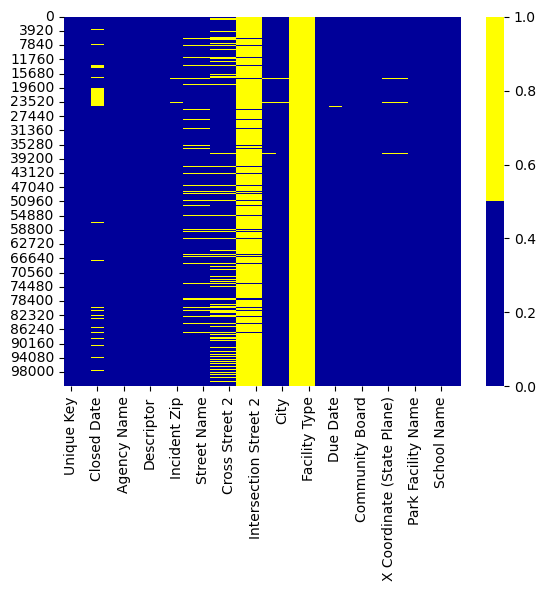

In [5]:
# Plot a heatmap of any missing data
cols = df.columns[:30]
colours = ['#000099', '#ffff00'] #yellow is missing, blue is not
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
# Try out a missing data percentage list! 
missing_data_percents = df.isna().mean() * 100
missing_data_percents

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                        10.725710
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          0.000000
Location Type                       0.005887
Incident Zip                        0.329690
Incident Address                    8.903585
Street Name                         8.904567
Cross Street 1                     16.344173
Cross Street 2                     16.376553
Intersection Street 1              91.242616
Intersection Street 2              91.242616
Address Type                        0.339502
City                                0.335577
Landmark                           99.965657
Facility Type                     100.000000
Status                              0.000000
Due Date                            0.114803
Resolution Action Updated Date      0.002944
Community 

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<AxesSubplot:xlabel='index'>

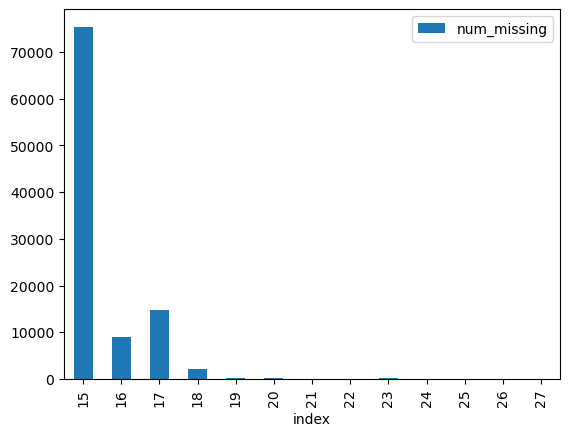

In [7]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [9]:
# Handle any missing data in your dataframe.
df_above_90_percent_null = df[df.columns[(df.isna().mean() * 100) >= 90]]
print(df_above_90_percent_null.columns)
print(df.shape)
df = df.drop(axis='columns', columns=df_above_90_percent_null)
print(df.shape)

Index(['Intersection Street 1', 'Intersection Street 2', 'Landmark',
       'Facility Type', 'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],
      dtype='object')
(101914, 85)
(101914, 70)


In [11]:
uni_columns = []
for col in df_zero_percent_null:
    print(f"{col}: {len(df_zero_percent_null[col].unique())}")
    if len(df_zero_percent_null[col].unique()) == 1:
        uni_columns.append(col)
print(uni_columns)
print(df.shape)
df = df.drop(axis='columns', columns=uni_columns)
print(df.shape)

NameError: name 'df_zero_percent_null' is not defined

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

count    101578.000000
mean      10728.680895
std         631.206648
min          83.000000
25%       10086.250000
50%       10472.000000
75%       11222.000000
max      100354.000000
Name: Incident Zip, dtype: float64

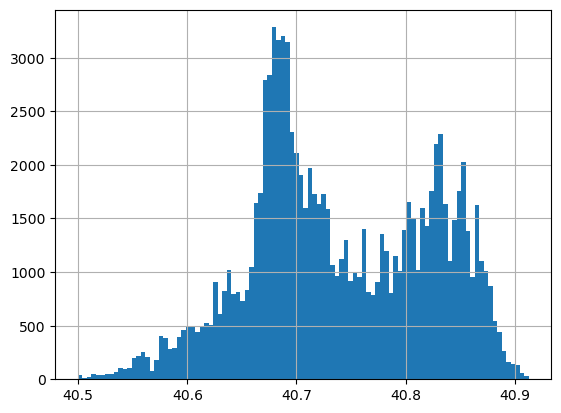

In [14]:
# Plot a histogram to see if there are any outliers.
df['Latitude'].hist(bins=100)
df['Incident Zip'].describe()

In [15]:
# Use the describe() method
df['Latitude'].describe()

count    101208.000000
mean         40.739304
std           0.082224
min          40.499502
25%          40.679740
50%          40.725009
75%          40.815428
max          40.912869
Name: Latitude, dtype: float64

<AxesSubplot:>

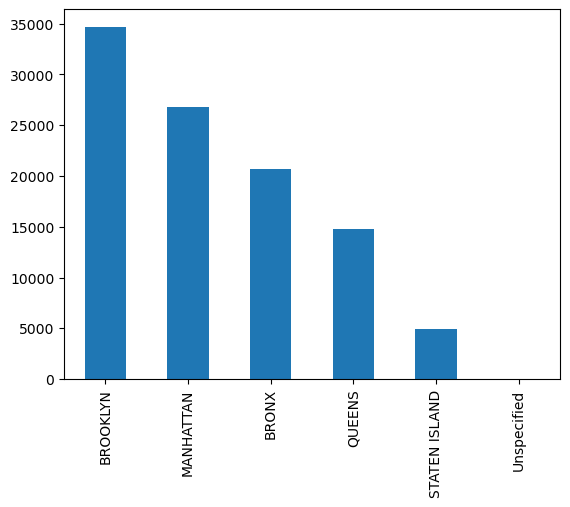

In [17]:
# Plot a bar chart
df['Borough'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe


## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [19]:
# Look for any irrelevant data in the dataframe. How will you handle it?
df.head()
df = df[['Unique Key', 'Created Date', 'Location Type', 'Incident Zip', 'Borough', 'Latitude', 'Longitude', 'Location']]
df.head()

,Unique Key,Created Date,Location Type,Incident Zip,Borough,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,3+ Family Mixed Use Building,10006.0,MANHATTAN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,Commercial Building,10306.0,STATEN ISLAND,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,1-2 Family Dwelling,10310.0,STATEN ISLAND,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,3+ Family Apt. Building,11206.0,BROOKLYN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,3+ Family Mixed Use Building,10462.0,BRONX,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [20]:
# Look for duplicates. How will you handle any duplicates?
print(df.shape)
df.drop_duplicates()
print(df.shape)

(101914, 8)
(101914, 8)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?



## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [21]:
# Try to convert all the strings in a column to lower or upper case. 
print(df['Borough'])
df['Borough'] = df['Borough'].str.lower()
print(df['Borough'])

0             MANHATTAN
1         STATEN ISLAND
2         STATEN ISLAND
3              BROOKLYN
4                 BRONX
              ...      
101909         BROOKLYN
101910         BROOKLYN
101911         BROOKLYN
101912           QUEENS
101913         BROOKLYN
Name: Borough, Length: 101914, dtype: object
0             manhattan
1         staten island
2         staten island
3              brooklyn
4                 bronx
              ...      
101909         brooklyn
101910         brooklyn
101911         brooklyn
101912           queens
101913         brooklyn
Name: Borough, Length: 101914, dtype: object


In [ ]:
from shapely.geometry import Point
import geopandas

